In [16]:
df = pd.read_csv("/MiniProjectDataset.csv")
df.head()

,DATE,country,NEW_Cases,NEW_DEATHS,vaccinated
0,11/1/2024,Argentina,NaN,NaN,unknown
1,11/1/2024,Australia,0.0,0.0,327
2,11/1/2024,Australia,0.0,0.0,327
3,11/1/2024,Brazil,971.0,48.0,430
4,11/1/2024,Canada,176.0,8.0,unknown


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
#EDA case study -- Covid-19 data analysis: Exploring Trends, vaccination impact and insights through Visualization
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df['DATE '] = pd.to_datetime(df['DATE '], errors='coerce')

df['DATE_numeric'] = df['DATE '].astype('int64') // 10**9

print(df[['DATE ', 'DATE_numeric']].head())

       DATE   DATE_numeric
0 2024-11-01    1730419200
1 2024-11-01    1730419200
2 2024-11-01    1730419200
3 2024-11-01    1730419200
4 2024-11-01    1730419200


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          165 non-null    datetime64[ns]
 1   country       165 non-null    object        
 2    NEW_Cases    154 non-null    float64       
 3   NEW_DEATHS    139 non-null    float64       
 4   vaccinated    165 non-null    object        
 5   DATE_numeric  165 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 7.9+ KB


In [19]:
df.shape

(165, 6)

In [20]:
# checking for missing values

df.isnull().sum()

,0
DATE,0
country,0
NEW_Cases,11
NEW_DEATHS,26
vaccinated,0
DATE_numeric,0


In [21]:
#the missing values are represented in more than one form
missing_vals = ['n/a', 'unknown', '?'] #creating a list
df = pd.read_csv('/MiniProjectDataset.csv', na_values=missing_vals)
df

,DATE,country,NEW_Cases,NEW_DEATHS,vaccinated
0,11/1/2024,Argentina,NaN,NaN,NaN
1,11/1/2024,Australia,0.0,0.0,327.0
2,11/1/2024,Australia,0.0,0.0,327.0
3,11/1/2024,Brazil,971.0,48.0,430.0
4,11/1/2024,Canada,176.0,8.0,NaN
...,...,...,...,...,...
160,11/30/2024,Brazil,514.0,25.0,NaN
161,11/30/2024,Canada,1133.0,56.0,438.0
162,11/30/2024,Canada,1133.0,56.0,438.0
163,11/30/2024,China,0.0,0.0,NaN


In [22]:
df['DATE '] = pd.to_datetime(df['DATE '])
df['Year'] = df['DATE '].dt.year
df['Month'] = df['DATE '].dt.month
df['Day'] = df['DATE '].dt.day
print(df.columns)

Index(['DATE ', 'country ', ' NEW_Cases', 'NEW_DEATHS', 'vaccinated ', 'Year',
       'Month', 'Day'],
      dtype='object')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         165 non-null    datetime64[ns]
 1   country      165 non-null    object        
 2    NEW_Cases   154 non-null    float64       
 3   NEW_DEATHS   139 non-null    float64       
 4   vaccinated   148 non-null    float64       
 5   Year         165 non-null    int32         
 6   Month        165 non-null    int32         
 7   Day          165 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(1)
memory usage: 8.5+ KB


In [24]:
#to identify the number of missing values in each column
df.isnull().sum()

,0
DATE,0
country,0
NEW_Cases,11
NEW_DEATHS,26
vaccinated,17
Year,0
Month,0
Day,0


In [25]:
#to identify columns with at least one missing values
df.isnull().any(axis=0)

,0
DATE,False
country,False
NEW_Cases,True
NEW_DEATHS,True
vaccinated,True
Year,False
Month,False
Day,False


In [26]:
#number of columns with all missing values
df.isnull().all(axis=0).sum()

np.int64(0)

In [27]:
#to identfy columns that have missing values throughout the column
df.isnull().all(axis=0)

,0
DATE,False
country,False
NEW_Cases,False
NEW_DEATHS,False
vaccinated,False
Year,False
Month,False
Day,False


In [28]:
#Missig data was handle by using the mean of the numeric column
from sklearn.impute import SimpleImputer

# 1. numeric columns
numeric_cols = df.select_dtypes(include='number').columns
mean_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = mean_imputer.fit_transform(df[numeric_cols])

# 3. optional: handle missing dates (if present)
# df.dropna(subset=['Date'], inplace=True)

df.head()

,DATE,country,NEW_Cases,NEW_DEATHS,vaccinated,Year,Month,Day
0,2024-11-01,Argentina,579.032468,28.47482,302.027027,2024.0,11.0,1.0
1,2024-11-01,Australia,0.000000,0.00000,327.000000,2024.0,11.0,1.0
2,2024-11-01,Australia,0.000000,0.00000,327.000000,2024.0,11.0,1.0
3,2024-11-01,Brazil,971.000000,48.00000,430.000000,2024.0,11.0,1.0
4,2024-11-01,Canada,176.000000,8.00000,302.027027,2024.0,11.0,1.0


In [29]:
# Print the cleaned DataFrame
df.isnull().sum()

,0
DATE,0
country,0
NEW_Cases,0
NEW_DEATHS,0
vaccinated,0
Year,0
Month,0
Day,0


In [30]:
#All missing data has been handled.
df.shape


(165, 8)

In [31]:
# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 15


In [32]:
# remove duplicates
df = df.drop_duplicates()

# verify
print(f"Duplicate rows after cleaning: {df.duplicated().sum()}")

Duplicate rows after cleaning: 0


In [33]:
df.head()

,DATE,country,NEW_Cases,NEW_DEATHS,vaccinated,Year,Month,Day
0,2024-11-01,Argentina,579.032468,28.47482,302.027027,2024.0,11.0,1.0
1,2024-11-01,Australia,0.000000,0.00000,327.000000,2024.0,11.0,1.0
3,2024-11-01,Brazil,971.000000,48.00000,430.000000,2024.0,11.0,1.0
4,2024-11-01,Canada,176.000000,8.00000,302.027027,2024.0,11.0,1.0
5,2024-11-01,China,1034.000000,51.00000,462.000000,2024.0,11.0,1.0


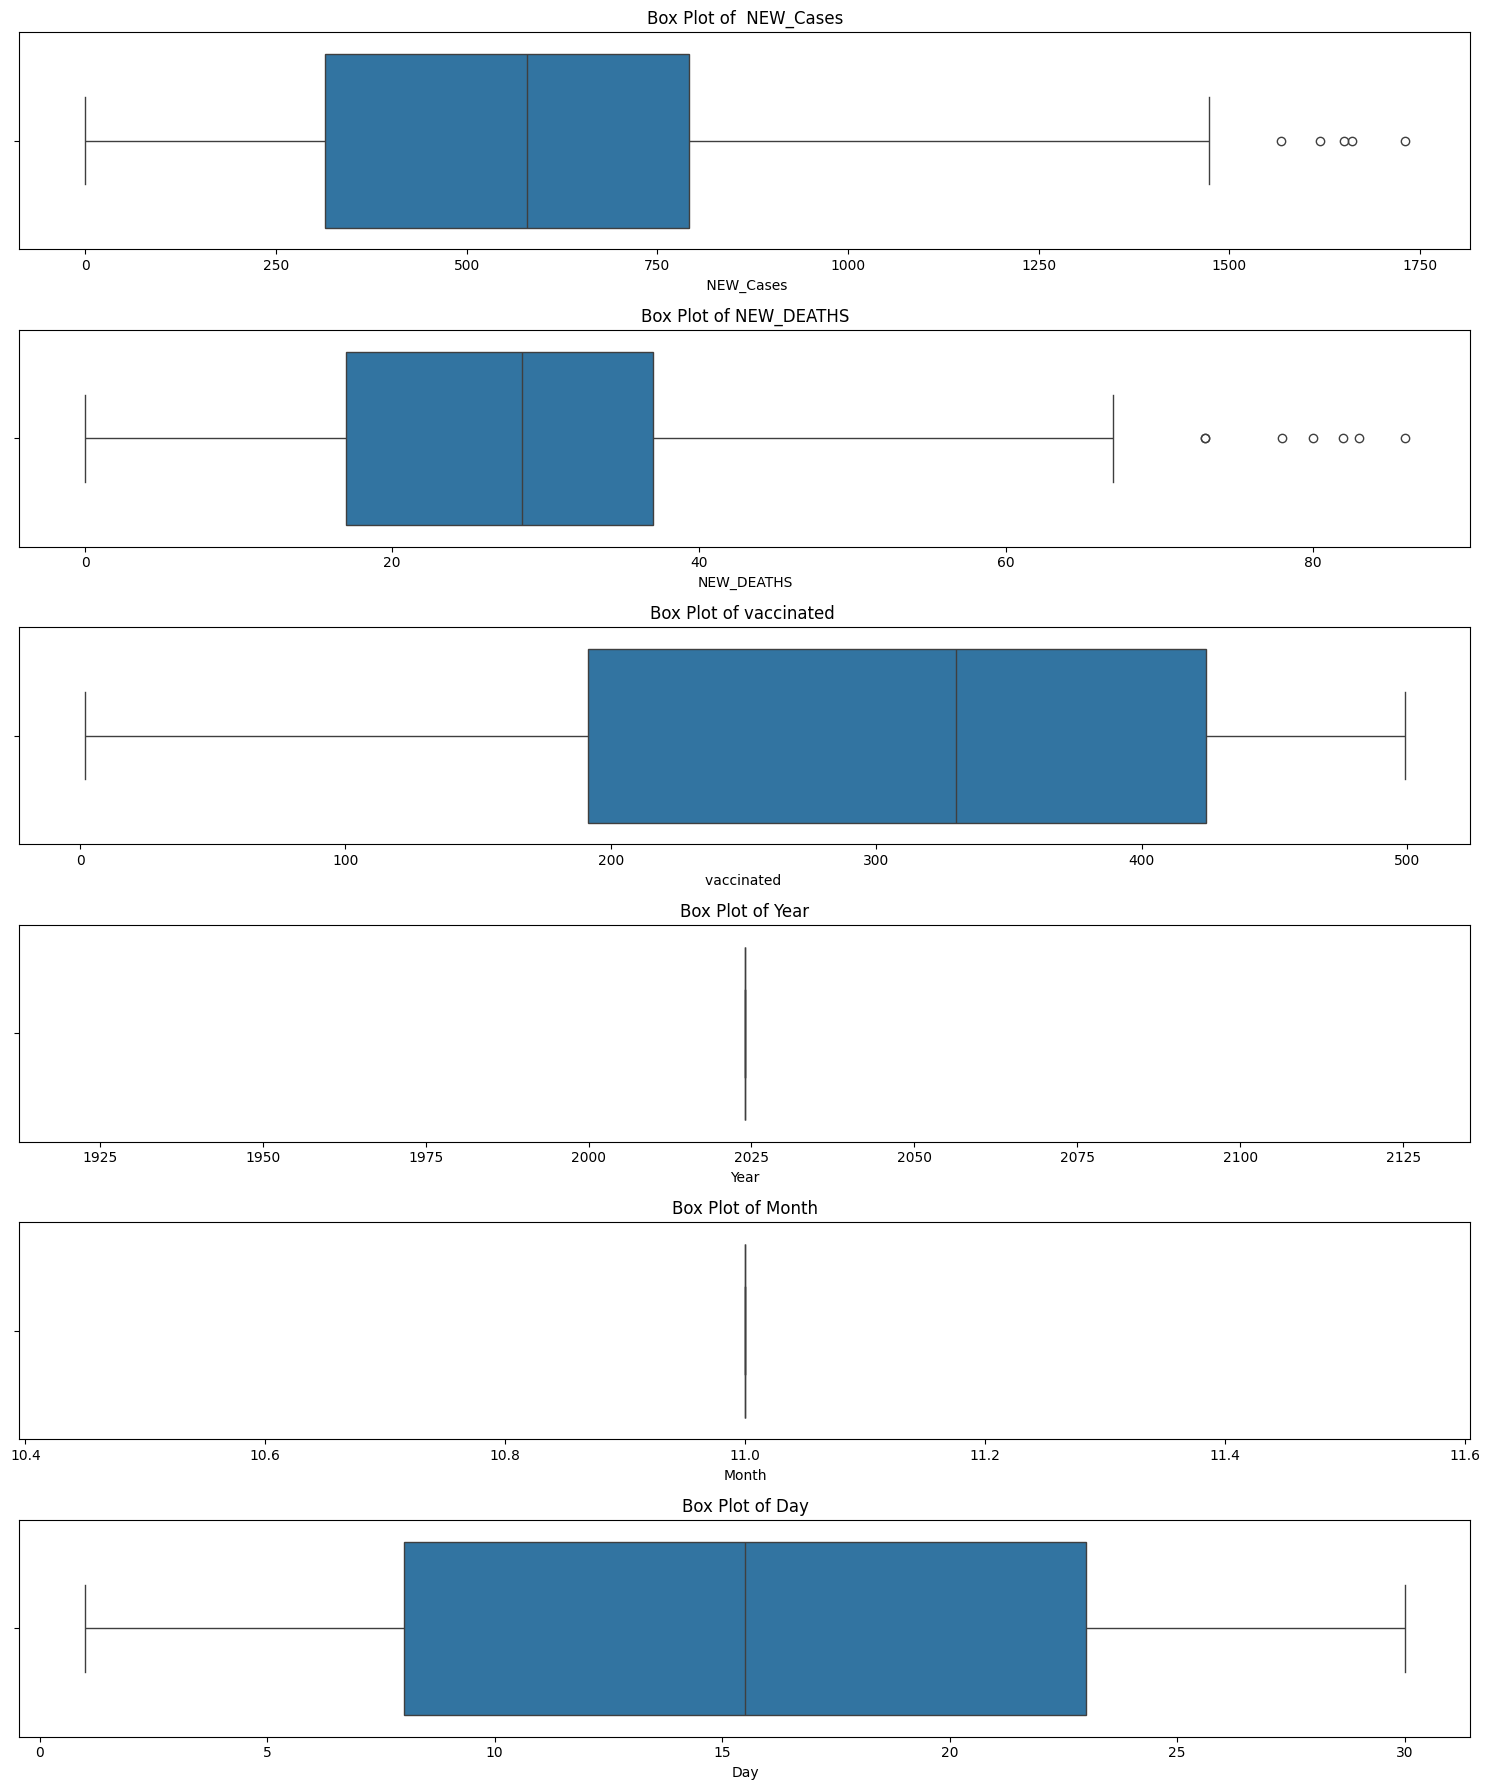

In [34]:
# Filter numerical columns for box plots
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(15, len(numerical_features) * 3))  # Adjust size based on the number of features

for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

plt.show()

#the job of enumerate(numerical_features, 1)
#is to loop over the list 'numerical_features' while also keeping track of an index i starting from 1.

In [35]:
#The NEW_DEATHS column is found to contain outliers skewed especially to the right.
#This is due to the high perception and genorosity values related to some countries in a given year.
#We would handle this accordingly as well.

In [36]:
#for 	NEW_DEATHS
Q1 = df['NEW_DEATHS'].quantile(0.25)
Q3 = df['NEW_DEATHS'].quantile(0.75)
IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data = df[(df.NEW_DEATHS > lower_limit) & (df.NEW_DEATHS < upper_limit)]
data.head()

,DATE,country,NEW_Cases,NEW_DEATHS,vaccinated,Year,Month,Day
0,2024-11-01,Argentina,579.032468,28.47482,302.027027,2024.0,11.0,1.0
1,2024-11-01,Australia,0.000000,0.00000,327.000000,2024.0,11.0,1.0
3,2024-11-01,Brazil,971.000000,48.00000,430.000000,2024.0,11.0,1.0
4,2024-11-01,Canada,176.000000,8.00000,302.027027,2024.0,11.0,1.0
5,2024-11-01,China,1034.000000,51.00000,462.000000,2024.0,11.0,1.0


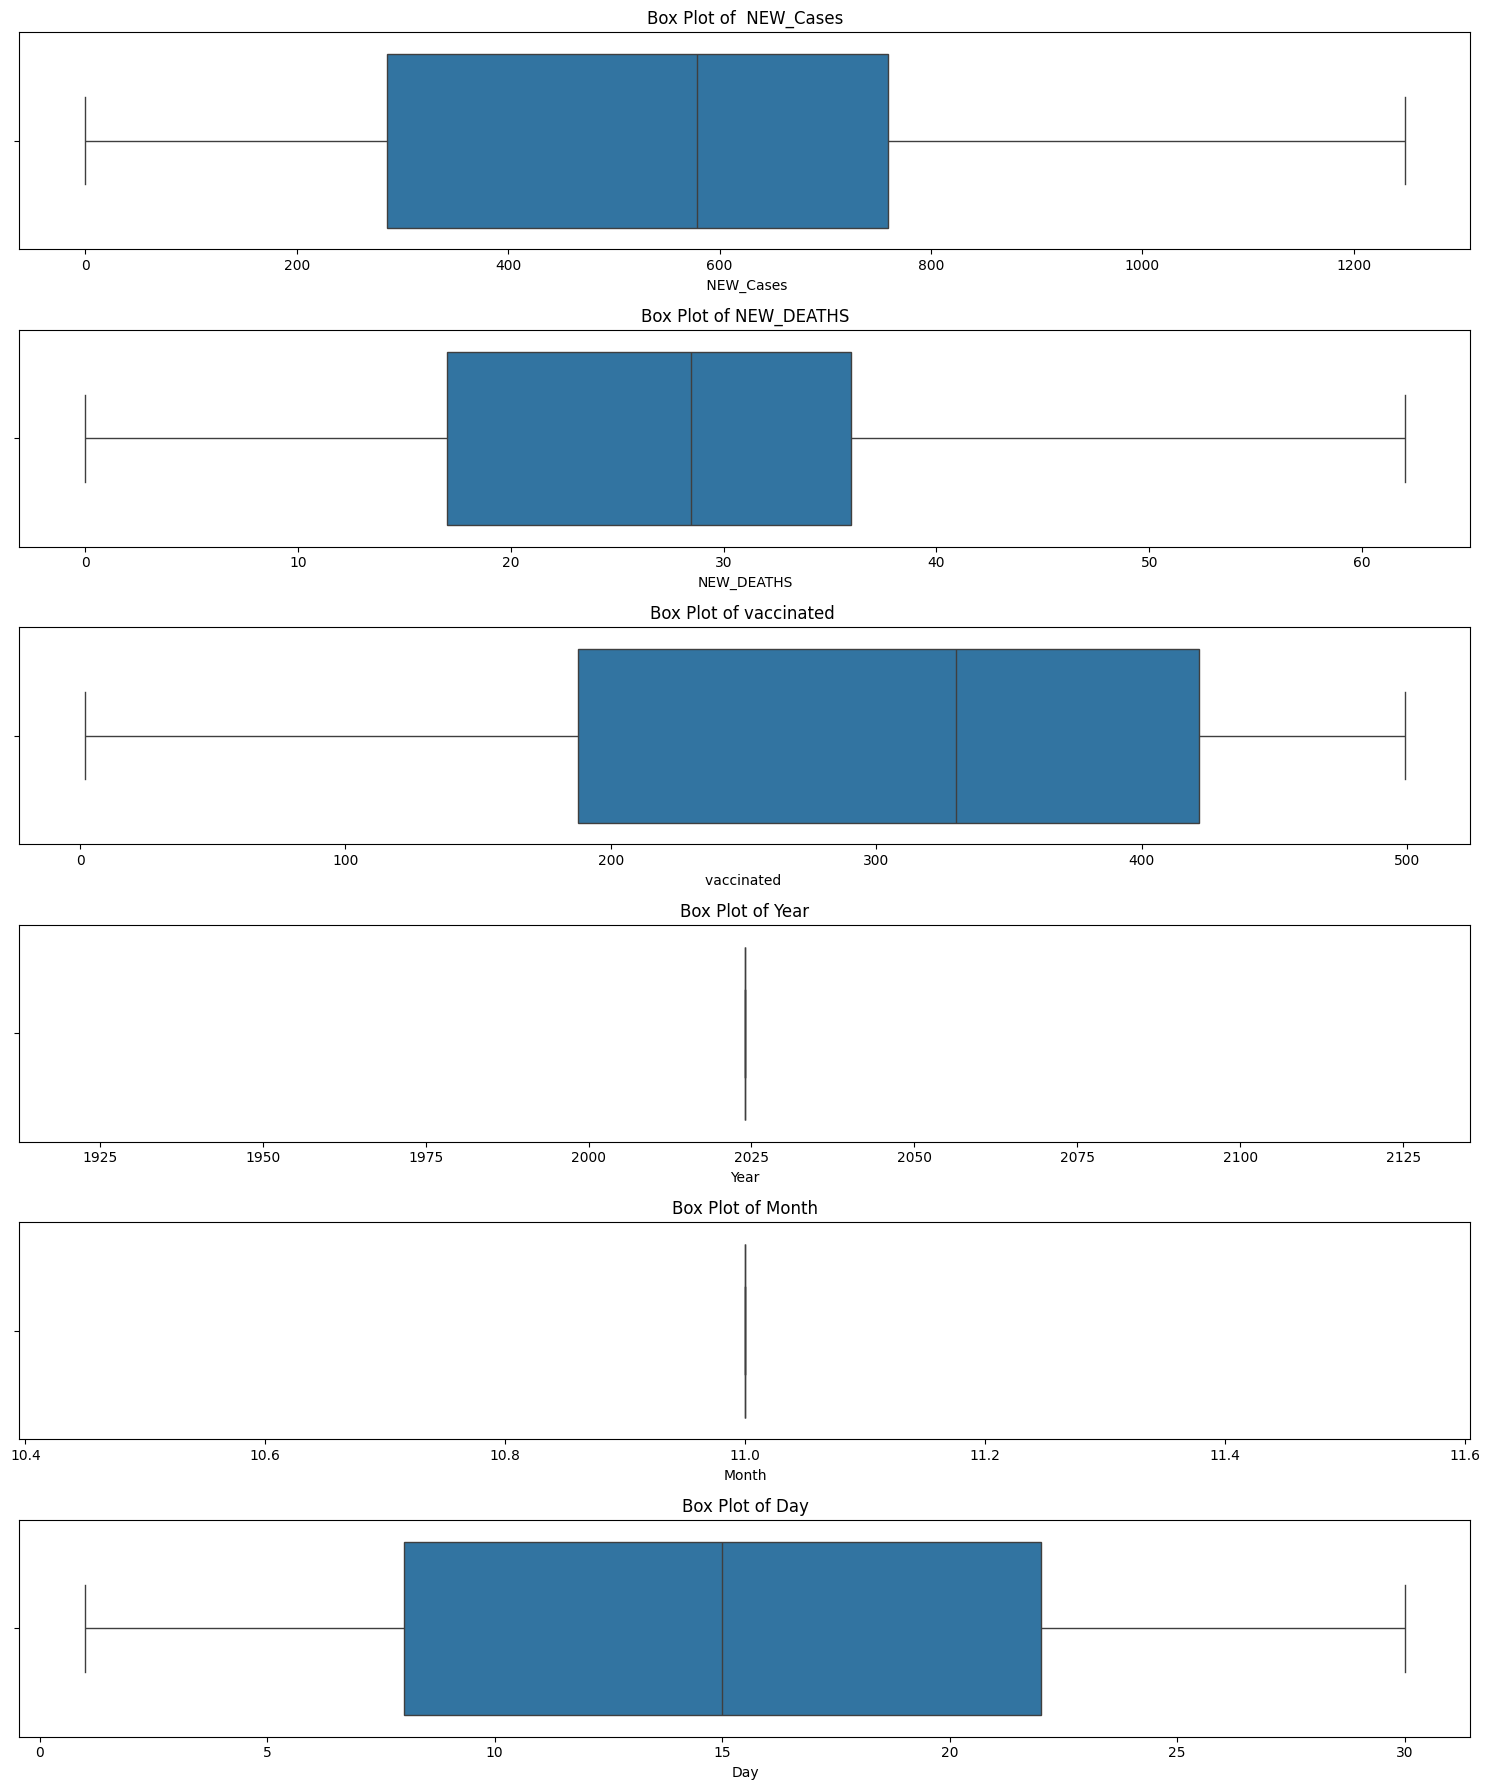

In [37]:
# Filter numerical columns for box plots
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for each numerical feature
plt.figure(figsize=(15, len(numerical_features) * 3))  # Adjust size based on the number of features
for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

plt.show()

In [38]:
data.shape

(142, 8)

In [39]:
#seperating data into numeric and categorical
cat_df = data.select_dtypes(include=['object'])

numerical_df = data.select_dtypes(include=['int64', 'float64'])

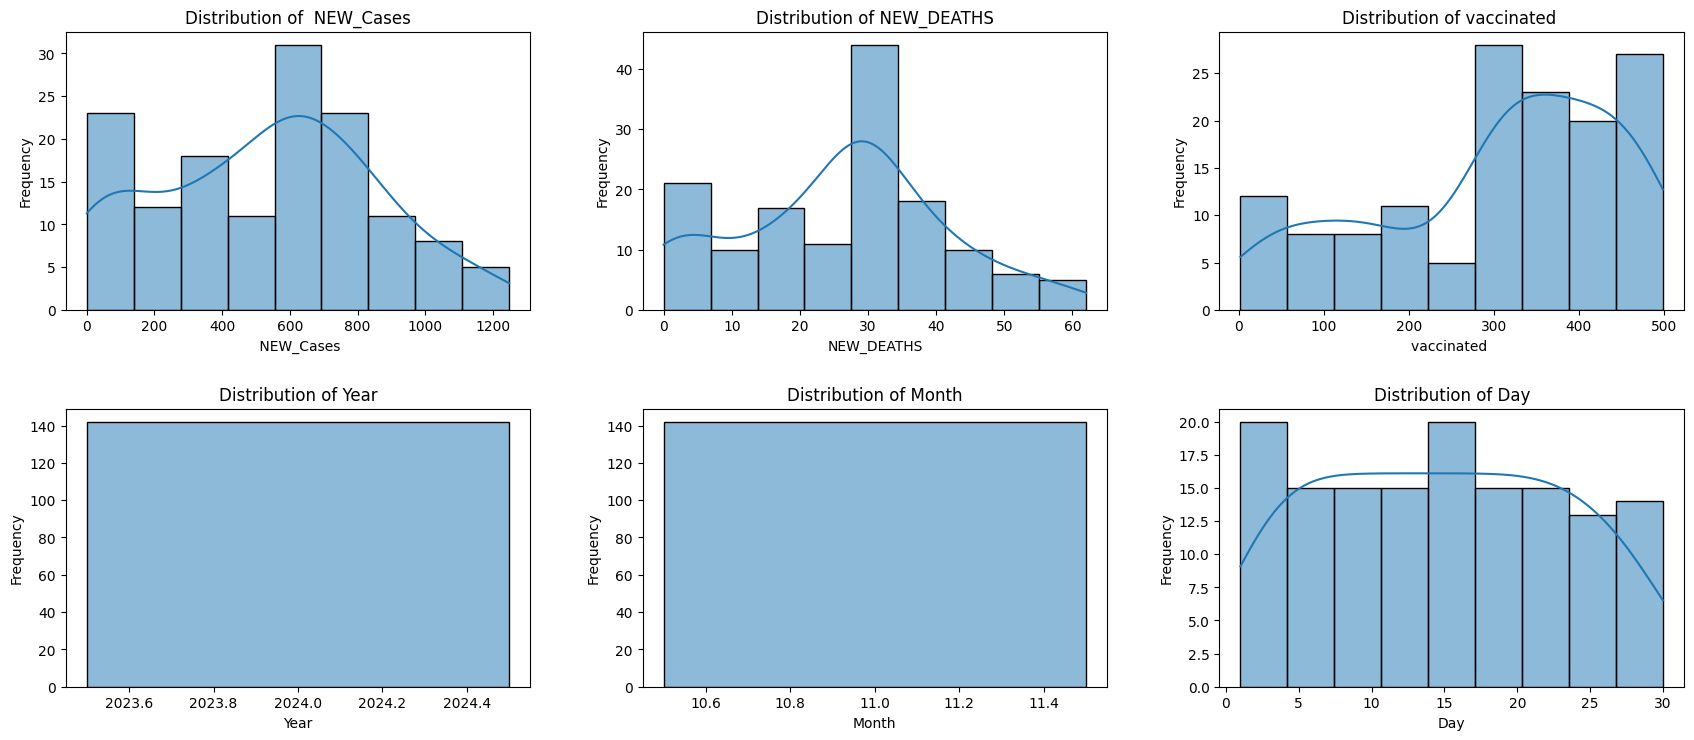

In [40]:
#creating a function to plot the distribution of the variables
def univariate_analysis(numerical_df):
    num_cols = len(numerical_df.columns)
    fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3,
                             figsize=(18, 4 * ((num_cols // 3) + 1)))
    fig.tight_layout(pad=5.0)

    axes = axes.flatten()  # Flatten axes array for easy iteration

    for i, col_name in enumerate(numerical_df.columns):
        sns.histplot(data=numerical_df, x=col_name, kde=True, ax=axes[i])
        # Use KDE for a smooth distribution curve
        axes[i].set_title(f'Distribution of {col_name}')
        axes[i].set_xlabel(col_name)
        axes[i].set_ylabel('Frequency')

    # Hide any extra subplots if the number of numeric columns is not a multiple of 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

univariate_analysis(numerical_df)

In [41]:
#NEW_Cases and DEATH_Cases are generally unimodal and roughly symmetrical,
#indicating that most of the disease in the country falls within a moderate range for these metrics.,
#with peaks in the middle range and gradual declines at the extremes
#The Day feature shows a consistent representation of data from 1 to 30,
#with slightly fewer entries in 15, reflecting variations in data collection during the pandemic.


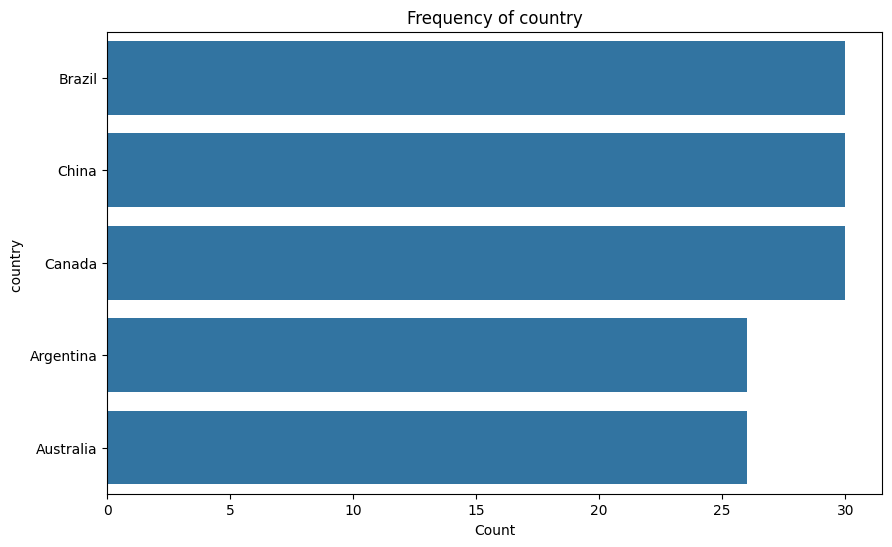

In [42]:
# Count the occurrences of each region
region_counts = data['country '].value_counts()

# Bar plot for country
plt.figure(figsize=(10, 6))
sns.barplot(y=region_counts.index, x=region_counts.values)
plt.title("Frequency of country")
plt.ylabel("country ")
plt.xlabel("Count")
plt.show()

In [43]:
#Brazil, Canada and China has the highest representation, followed by Argentina and Australia with lowest representation
country_counts = data['country '].value_counts()
country_counts

,count
country,
Brazil,30
China,30
Canada,30
Argentina,26
Australia,26


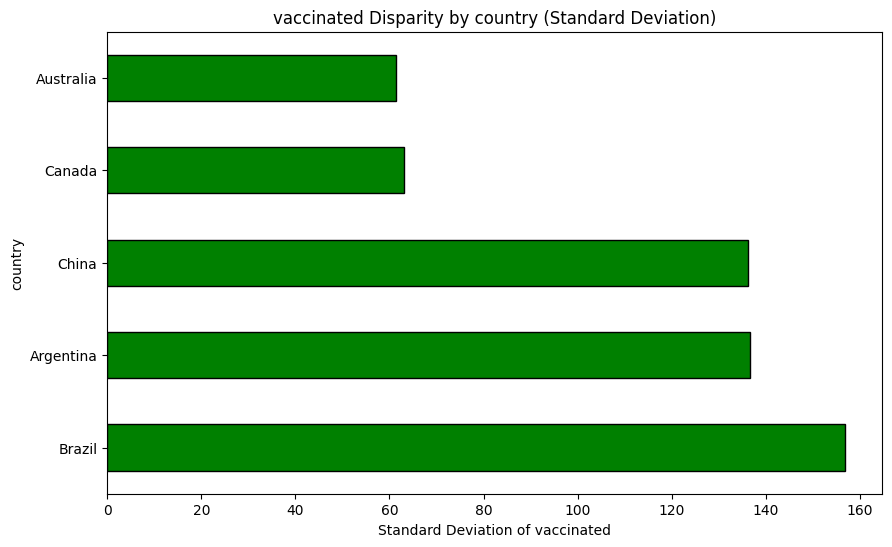

In [44]:
#Bivariate and Multivariate analysis
# Calculate standard deviation of vaccinated by country
region_dispersion = data.groupby('country ')['vaccinated '].std().sort_values(ascending=False)

# Plot the disparities in vaccinated by country
region_dispersion.plot(kind='barh', figsize=(10, 6), color='green', edgecolor='black')
plt.title('vaccinated Disparity by country (Standard Deviation)')
plt.xlabel('Standard Deviation of vaccinated')
plt.ylabel('country')
plt.show()

Correlation between NEW_DEATHS and vaccinated: 0.07989401950252914


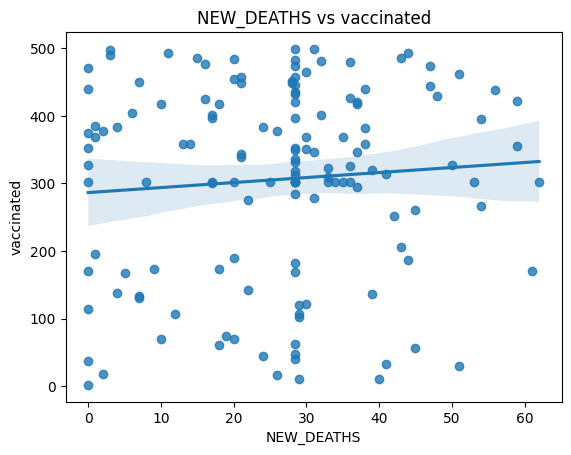

In [45]:
#Is there a strong correlation between NEW_DEATHS and vaccinated?
# Correlation calculation
correlation = data['NEW_DEATHS'].corr(data['vaccinated '])
print(f"Correlation between NEW_DEATHS and vaccinated: {correlation}")

# Scatter plot with regression line
sns.regplot(x='NEW_DEATHS', y='vaccinated ', data=data)
plt.title("NEW_DEATHS vs vaccinated")
plt.xlabel("NEW_DEATHS")
plt.ylabel("vaccinated")
plt.show()
#The slope line brings out a straight line, so there is no correlation between NEW_DEATHHS and vaccinated person

Correlation between NEW_Cases and vaccinated: 0.10914425984156381


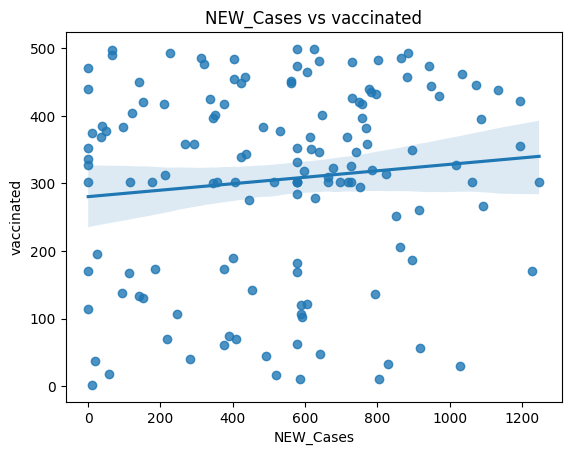

In [46]:
# Correlation calculation
correlation = data[' NEW_Cases'].corr(data['vaccinated '])
print(f"Correlation between NEW_Cases and vaccinated: {correlation}")

# Scatter plot with regression line
sns.regplot(x=' NEW_Cases', y='vaccinated ', data=data)
plt.title("NEW_Cases vs vaccinated")
plt.xlabel("NEW_Cases")
plt.ylabel("vaccinated")
plt.show()
#The slope line brings out a straight line, so there is no correlation between NEW_Cases and vaccinated persons

Correlation between NEW_Cases and NEW_DEATHS: 0.9458774198257383


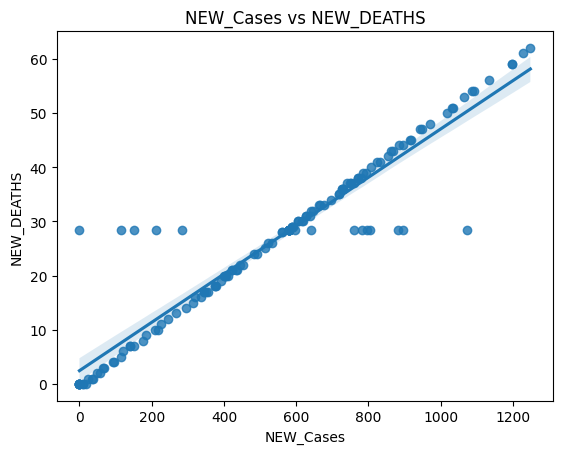

In [47]:
# Correlation calculation
correlation = data[' NEW_Cases'].corr(data['NEW_DEATHS'])
print(f"Correlation between NEW_Cases and NEW_DEATHS: {correlation}")

# Scatter plot with regression line
sns.regplot(x=' NEW_Cases', y='NEW_DEATHS', data=data)
plt.title("NEW_Cases vs NEW_DEATHS")
plt.xlabel("NEW_Cases")
plt.ylabel("NEW_DEATHS")
plt.show()
#The positive slope of the points indicates a strong positive relationship: as NEW_Cases increases, NEW_DEATHS also tend to increase.
#The points are fairly clustered around a trend line, suggesting a consistent correlation between cases and deaths.
#However, there is still some variation, with a few outliers where countries have relatively high New cases but lower Deaths,
#or vice versa. There is a strong positive correlation between NEW_Cases and NEW_DEATHS.

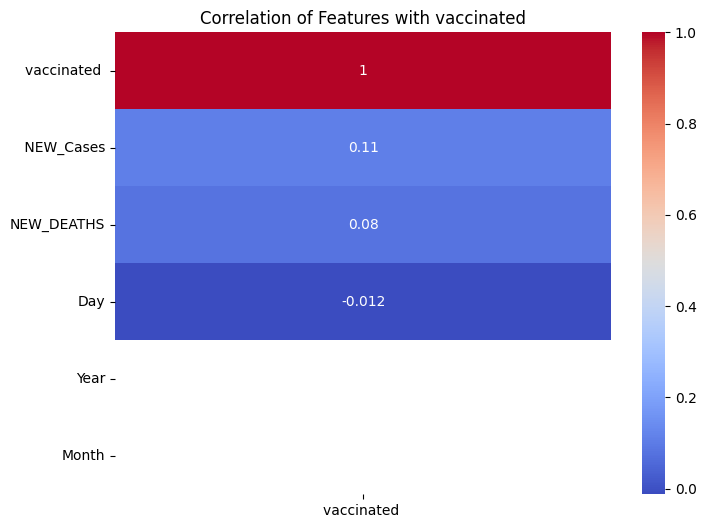

In [48]:
# Correlation matrix
# Heatmap of top correlations
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr()[['vaccinated ']].sort_values(by='vaccinated ', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with vaccinated")
plt.show()

#None of the numerical variables are correlated with vaccination

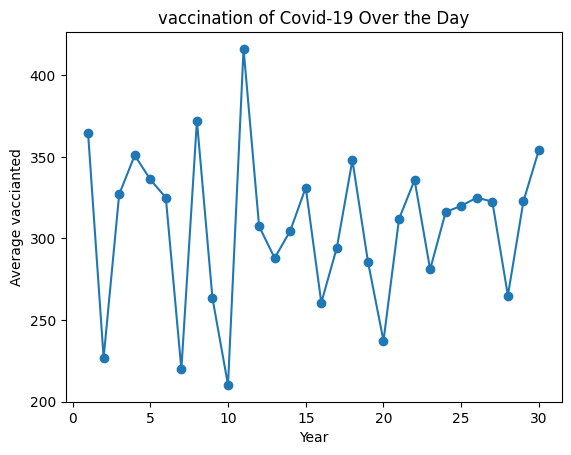

In [49]:
# Line plot for average happiness score by year
average_vaccianted_by_day = df.groupby('Day')['vaccinated '].mean()
plt.plot(average_vaccianted_by_day, marker='o')
plt.title("vaccination of Covid-19 Over the Day")
plt.xlabel("Year")
plt.ylabel("Average vaccianted")
plt.show()
#The distribution of vaccine is stationary across the day in 2024.